2.Friendly Tasks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("abc.csv")

In [3]:
# 1. View first 5 rows
print("First 5 rows:")
df.head()

First 5 rows:


,Product,Category,Price Before,Price After,Weight Before,Weight After,Date
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022


In [4]:
# 2. Shape, columns, data types
print("Shape:\n", df.shape)
print("\nColumns\n:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

Shape:
 (100, 7)

Columns
: ['Product', 'Category', 'Price Before', 'Price After', 'Weight Before', 'Weight After', 'Date']

Data types:
 Product           object
Category          object
Price Before     float64
Price After      float64
Weight Before    float64
Weight After     float64
Date              object
dtype: object


In [5]:
print("Summary stats:\n", df.describe())

Summary stats:
        Price Before  Price After  Weight Before  Weight After
count    100.000000   100.000000     100.000000    100.000000
mean     270.460800   243.526199       4.405000      4.570820
std      138.376012   124.029937       1.350802      1.414995
min       50.040000    42.891500       2.040000      2.070400
25%      149.642500   132.454050       3.347500      3.495725
50%      272.610000   248.351550       4.340000      4.499550
75%      396.617500   354.867800       5.482500      5.739025
max      499.080000   446.183000       6.980000      7.429000


In [6]:
# 3. Missing values & duplicates
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 Product          0
Category         0
Price Before     0
Price After      0
Weight Before    0
Weight After     0
Date             0
dtype: int64

Duplicates: 0


In [7]:
df.columns


Index(['Product', 'Category', 'Price Before', 'Price After', 'Weight Before',
       'Weight After', 'Date'],
      dtype='object')

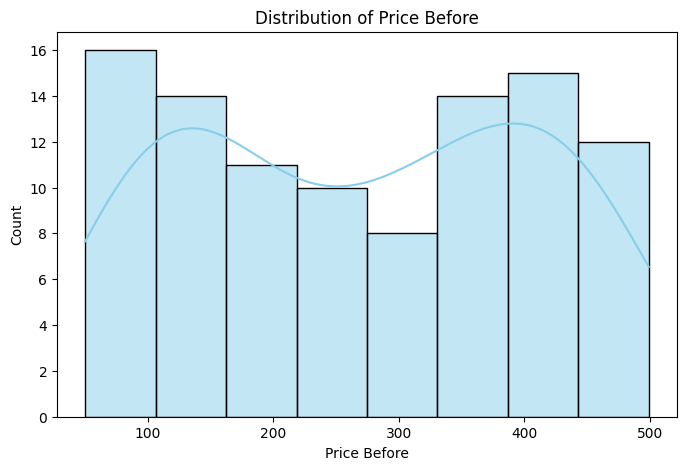

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price Before'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Before')
plt.xlabel('Price Before')
plt.ylabel('Count')
plt.show()

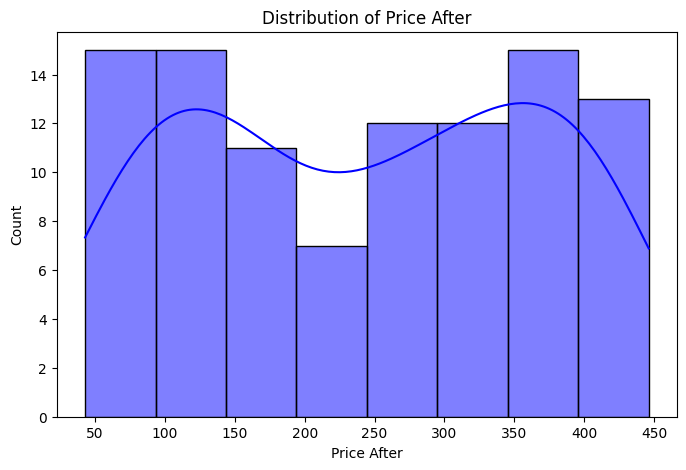

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price After'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Price After')
plt.xlabel('Price After')
plt.ylabel('Count')
plt.show()

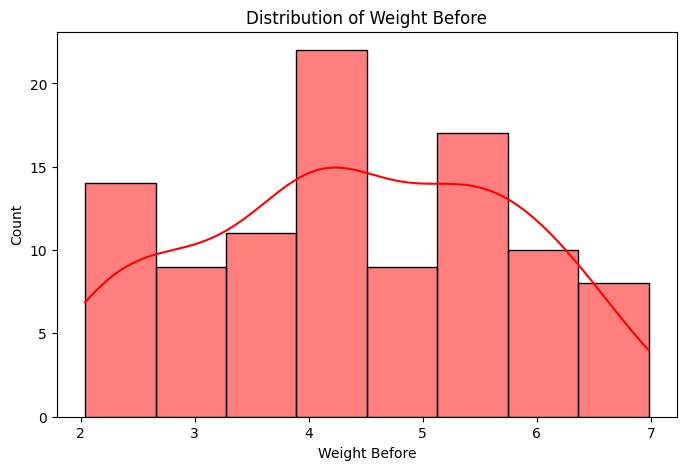

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight Before'], kde=True, color='red', edgecolor='black')
plt.title('Distribution of Weight Before')
plt.xlabel('Weight Before')
plt.ylabel('Count')
plt.show()

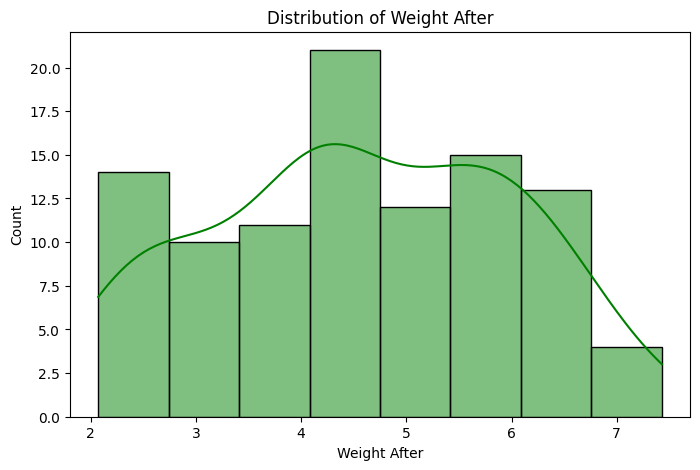

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight After'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of Weight After')
plt.xlabel('Weight After')
plt.ylabel('Count')
plt.show()

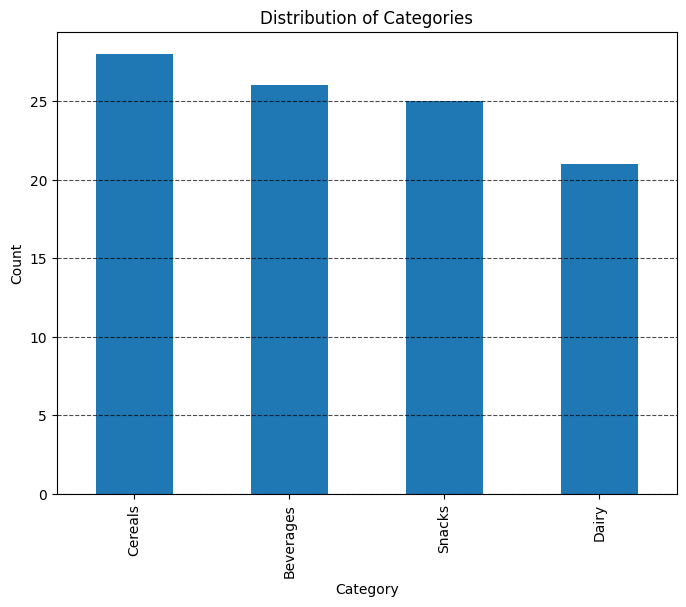

In [12]:
plt.figure(figsize=(8, 6))
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.grid(axis='y', linestyle='--', alpha=0.7,color='black')
plt.show()

In [13]:
# Top 3 products with biggest weight drop
df['Weight Drop'] = df['Weight Before'] - df['Weight After']
print(df.nlargest(3, 'Weight Drop')[['Product', 'Weight Drop']])

           Product  Weight Drop
32           Fanta      -0.0235
98           Chips      -0.0271
38  Cheddar Cheese      -0.0304


In [14]:
# Top 3 products with biggest price increase
df['Price Increase'] = df['Price After'] - df['Price Before']
print(df.nlargest(3, 'Price Increase')[['Product', 'Price Increase']])


          Product  Price Increase
99  Rice Krispies         -3.7560
74    Corn Flakes         -4.0440
1    Mountain Dew         -4.1268


In [15]:
# Mean, median, std of weight change
df['Weight Change'] = df['Weight After'] - df['Weight Before']
print("Weight change mean:", df['Weight Change'].mean())
print("median:", df['Weight Change'].median())
print("std:", df['Weight Change'].std())

Weight change mean: 0.16581999999999994
median: 0.15225
std: 0.12179666612345297


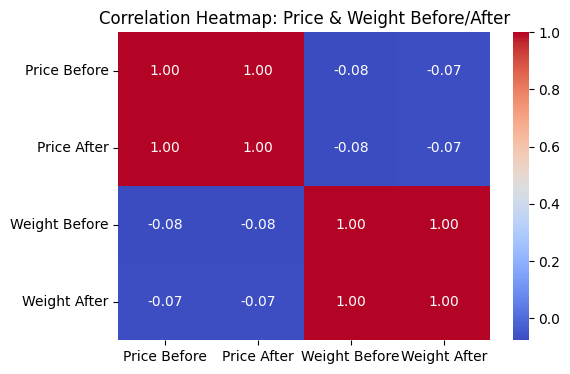

In [16]:
corr_columns = ['Price Before', 'Price After', 'Weight Before', 'Weight After']
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap: Price & Weight Before/After')
plt.show()

In [17]:
df['Weight Change %'] = ((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100
df['Price Change %'] = ((df['Price After'] - df['Price Before']) / df['Price Before']) * 100
df[['Product','Weight Change %','Price Change %']]


,Product,Weight Change %,Price Change %
0,Cheerioes,1.000000,-8.000000
1,Mountain Dew,7.000000,-4.000000
2,Whole Milk,8.000000,-13.000000
3,Special K,7.000000,-4.000000
4,Oreos,15.000000,-14.000000
...,...,...,...
95,Pretzels,4.315789,-5.868403
96,Cheddar Cheese,3.277879,-12.161440
97,Cream,1.007009,-12.231301
98,Chips,1.220721,-6.281408


C:\Users\HP\AppData\Local\Temp\ipykernel_4544\579187729.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Weight Change %', y='Price Change %', data=df, palette='viridis')


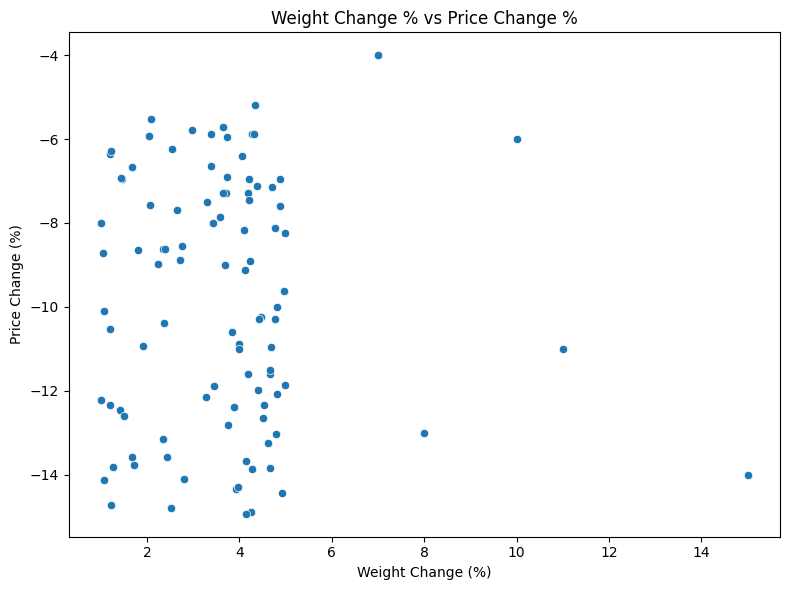

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Weight Change %', y='Price Change %', data=df, palette='viridis')
plt.title('Weight Change % vs Price Change %')
plt.xlabel('Weight Change (%)')
plt.ylabel('Price Change (%)')
plt.tight_layout()
plt.show()

In [19]:
df.head()


,Product,Category,Price Before,Price After,Weight Before,Weight After,Date,Weight Drop,Price Increase,Weight Change,Weight Change %,Price Change %
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023,-0.0517,-27.9784,0.0517,1.0,-8.0
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022,-0.3836,-4.1268,0.3836,7.0,-4.0
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022,-0.2688,-29.7505,0.2688,8.0,-13.0
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022,-0.3388,-17.1636,0.3388,7.0,-4.0
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022,-0.9690,-62.2272,0.9690,15.0,-14.0
